# Data Mining : 재난 문자 분류하기
 **1) 데이터 속성 파악하기**

In [315]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

data = pd.read_csv('train.csv', encoding='utf-8')
print(data)
print()
print()
data.info()

         id keyword  ...                                               text target
0         1     NaN  ...  Our Deeds are the Reason of this #earthquake M...      1
1         4     NaN  ...             Forest fire near La Ronge Sask. Canada      1
2         5     NaN  ...  All residents asked to 'shelter in place' are ...      1
3         6     NaN  ...  13,000 people receive #wildfires evacuation or...      1
4         7     NaN  ...  Just got sent this photo from Ruby #Alaska as ...      1
...     ...     ...  ...                                                ...    ...
7608  10869     NaN  ...  Two giant cranes holding a bridge collapse int...      1
7609  10870     NaN  ...  @aria_ahrary @TheTawniest The out of control w...      1
7610  10871     NaN  ...  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...      1
7611  10872     NaN  ...  Police investigating after an e-bike collided ...      1
7612  10873     NaN  ...  The Latest: More Homes Razed by Northern Calif...      1

[76

**2) 중복 샘플 제거하기**

중복 제거 후 총 샘플의 수 :  7503

   target  count
0       0   4305
1       1   3198


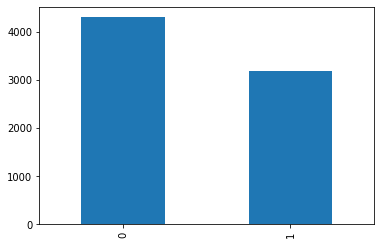

In [316]:
data.drop_duplicates(subset=['text'], inplace=True)
print('중복 제거 후 총 샘플의 수 : ', len(data))
print()

data['target'].value_counts().plot(kind='bar');
print(data.groupby('target').size().reset_index(name='count'))

In [317]:
Texts = data['text']
Targets = data['target']
print('트위터 text 내용의 개수 : ', len(Texts))
print('레이블의 개수 : ', len(Targets));

트위터 text 내용의 개수 :  7503
레이블의 개수 :  7503


**3) 토큰화, 텍스트 길이 살펴보기**

In [319]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(Texts)
sequences = tokenizer.texts_to_sequences(Texts)
print(sequences[:5])
print()
word_to_index = tokenizer.word_index

[[117, 4571, 25, 4, 857, 8, 21, 264, 134, 1901, 4572, 89, 40], [185, 43, 233, 782, 6844, 6845, 1383], [40, 1723, 1590, 7, 6846, 6, 6847, 25, 131, 6848, 20, 1724, 39, 426, 282, 57, 2109, 6, 720, 1384, 25, 1085], [817, 2875, 63, 4573, 1478, 282, 1384, 6, 96], [34, 97, 1199, 21, 314, 23, 6849, 2110, 30, 265, 23, 1478, 6850, 70, 5, 186]]



In [320]:
threshold = 2
total_cnt = len(word_to_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value

  if(value < threshold):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value

print('등장 빈도가 1번 이하인 희귀 단어의 수 : ', rare_cnt)
print('단어 집합에서 희귀 단어의 비율 : ', (rare_cnt / total_cnt) * 100)
print('전체 등장 빈도에서 희귀 단어 등장 빈도 비율 : ', (rare_cnt/ total_freq) * 100)

등장 빈도가 1번 이하인 희귀 단어의 수 :  15857
단어 집합에서 희귀 단어의 비율 :  69.8546255506608
전체 등장 빈도에서 희귀 단어 등장 빈도 비율 :  12.566569454130477


In [321]:
Texts = sequences
print('텍스트의 최대 길이 : ', max(len(l) for l in Texts))
print('텍스트의 최소 길이 : ', min(len(l) for l in Texts))
print('텍스트의 평균 길이 : ', (sum(map(len, Texts))/len(Texts)))

텍스트의 최대 길이 :  33
텍스트의 최소 길이 :  1
텍스트의 평균 길이 :  16.817806210848993


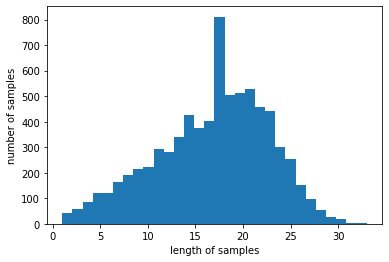

In [322]:
plt.hist([len(s) for s in Texts], bins=30)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

**4) 빈도 수가 낮은 희귀 단어 제거하기**

In [0]:
Texts = data['text']
tokenizer = Tokenizer(num_words = total_cnt - rare_cnt + 1)
tokenizer.fit_on_texts(Texts)
sequences = tokenizer.texts_to_sequences(Texts)
word_to_index = tokenizer.word_index

**5) 길이가 3 이하인 단어 제거하기**

In [324]:
print('길이 3 이하인 단어 제거 : ')
for word in word_to_index.items():
  if len(word[0]) <= 3:
    print(word[0], end = ' ')
    for sequence in sequences:
      if word[1] in sequence:
        sequence.remove(word[1])

길이 3 이하인 단어 제거 : 
t co the a in to of and i is for on you my it at by be are was amp as me up but so not out no all an has i'm get now we if new via 2 or one how he who do can ' 3 u her his us day off got 1 why man had rt s see our two gt go 4 car 5 may war say did way too w its am lol old hot û 8 pm him 9 she let any 6 god im top hit oil 10 15 ass set 08 m 11 run bad 7 red end 70 air big p bag ûò 40 05 n ok bus d 30 o 0 put saw oh st use lot b 00 r due c few lt fan yet 50 ur far 16 men mp die fun lab yes pic sue ûó 06 ago i'd abc low pkk job bc own 25 hey bar tv x 01 hat rd e la 20 mom 17 boy aug 13 guy 12 usa wow win omg gun 60 bbc uk try 'i 100 ca eye mad cnn 18 24 ûï dog vs mph sea gop sad sex led dr dad bed gas art buy ppl nws rly sky v cut de cdt aba 29 act f 07 mod ap sun re med map 600 nyc ave wtf bit 22 û 1st hi tho fat san 04 cat apc el 21 l gay bay ice box 2nd 90 kid non mix dan mr ft 130 nc bin un jeb sit ii son ban ask 26 kit yyc pdp hwy edm 23 gov rip cop 14 j 300 d

**6) RNN으로 분류하기**

In [325]:
max_len = max(len(l) for l in sequences)
data = pad_sequences(sequences, maxlen = max_len)
print('훈련 데이터의 shape: ', data.shape)

n_of_train = int(len(Texts)* 0.9)
print('전체 데이터의 크기 : ', len(Texts))
print('훈련 데이터의 크기 : ', n_of_train)
print('테스트 데이터의 크기 : ', len(Texts) - n_of_train)

X_test = data[n_of_train:]
Y_test = np.array(Targets[n_of_train:])
X_train = data[:n_of_train]
Y_train = np.array(Targets[:n_of_train])

훈련 데이터의 shape:  (7503, 21)
전체 데이터의 크기 :  7503
훈련 데이터의 크기 :  6752
테스트 데이터의 크기 :  751


In [326]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

vocab_size = len(word_to_index) + 1

model = Sequential()
model.add(Embedding(vocab_size, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, Y_train, epochs = 4, batch_size = 256, validation_split = 0.3)

Epoch 1/4
19/19 [==============================] - 0s 24ms/step - loss: 0.6529 - acc: 0.6168 - val_loss: 0.6427 - val_acc: 0.6545
Epoch 2/4
19/19 [==============================] - 0s 17ms/step - loss: 0.5195 - acc: 0.7723 - val_loss: 0.5765 - val_acc: 0.7043
Epoch 3/4
19/19 [==============================] - 0s 16ms/step - loss: 0.3884 - acc: 0.8436 - val_loss: 0.5617 - val_acc: 0.7132
Epoch 4/4
19/19 [==============================] - 0s 16ms/step - loss: 0.3244 - acc: 0.8758 - val_loss: 0.5638 - val_acc: 0.7295


In [327]:
print("\n 테스트 정확도 : %.3f" % (model.evaluate(X_test, Y_test)[1]))

24/24 [==============================] - 0s 3ms/step - loss: 0.5207 - acc: 0.7324

 테스트 정확도 : 0.732


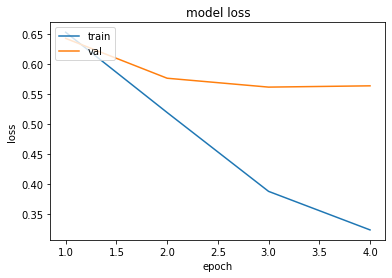

In [328]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()